In [1]:
import pandas as pd
from datasets import load_dataset
import numpy as np
from pathlib import Path
import time
import tikzplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

In [2]:
import sys
sys.path.append('/home/cernypro/dev/source/ml4logs/src/bert')
from dataset_utils import my_caching_load_from_disk

In [4]:
used_dataset_str_paths = {
        'train-data-HDFS1-cv1-1-time-ordered': '/home/cernypro/dev/source/ml4logs/data/interim/HDFS1/no_timestamps_train-data-HDFS1-cv1-1-time-ordered.log',
        'HDFS2-secondarynamenode': '/home/cernypro/dev/source/ml4logs/data/interim/HDFS2/no_timestamps_cleaned/hadoop-hdfs-secondarynamenode-mesos-01.log',
        'HDFS2-namenode': '/home/cernypro/dev/source/ml4logs/data/interim/HDFS2/no_timestamps_cleaned/hadoop-hdfs-namenode-mesos-01.log',
        'HDFS2-datanode-01': '/home/cernypro/dev/source/ml4logs/data/interim/HDFS2/no_timestamps_cleaned/hadoop-hdfs-datanode-mesos-01.log',
        'HDFS2-datanode-13': '/home/cernypro/dev/source/ml4logs/data/interim/HDFS2/no_timestamps_cleaned/hadoop-hdfs-datanode-mesos-13.log',
        'Spark': '/home/cernypro/dev/source/ml4logs/data/interim/Spark/no_timestamps_spark.log',
        'Zookeeper': '/home/cernypro/dev/source/ml4logs/data/interim/Zookeeper/no_timestamps_zookeeper.log',
        'BGL': '/home/cernypro/dev/source/ml4logs/data/interim/BGL/no_timestamps_bgl.log',
        'Hadoop': '/home/cernypro/dev/source/ml4logs/data/interim/Hadoop/no_timestamps_hadoop.log',
    }
used_dataset_paths = {name: Path(str_path) for name, str_path in used_dataset_str_paths.items()}

In [6]:
start = time.time()
datasets = {name: load_dataset('text', data_files=str(path), split='train') for name, path in used_dataset_paths.items()}
print(f"Loading datasets Time taken: {time.time() - start}s")

Using custom data configuration default-c37dfdef1afd7af3


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-c37dfdef1afd7af3/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-b99be5cdfeb6e002


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-b99be5cdfeb6e002/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-f41d8aa6fd25d289


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-f41d8aa6fd25d289/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-19212d6ab26463c2


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-19212d6ab26463c2/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-e96a232d708f947b


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-e96a232d708f947b/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-797ae1d4c6e31079


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-797ae1d4c6e31079/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-84762dc70b7e16ca


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-84762dc70b7e16ca/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-5d8b7074f203daa6


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-5d8b7074f203daa6/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Using custom data configuration default-b330722173ed2c9c


Dataset text downloaded and prepared to /data/temporary/huggingface_2369479/datasets/text/default-b330722173ed2c9c/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.
Loading datasets Time taken: 81.58353996276855s


In [7]:
ds_lens = {name: len(ds) for name, ds in datasets.items()}

In [8]:
ds_lens

{'train-data-HDFS1-cv1-1-time-ordered': 9051028,
 'HDFS2-secondarynamenode': 710534,
 'HDFS2-namenode': 16892910,
 'HDFS2-datanode-01': 2614790,
 'HDFS2-datanode-13': 1968119,
 'Spark': 33236604,
 'Zookeeper': 74380,
 'BGL': 4747963,
 'Hadoop': 393431}

In [3]:
train_time_ordered_ds = my_caching_load_from_disk(Path('/home/cernypro/dev/source/ml4logs/data/interim/HDFS1/no_timestamps_train-data-HDFS1-cv1-1-time-ordered/purely_tokenized_distilbert-base-cased'))

In [4]:
lens_ds = train_time_ordered_ds.map(lambda tokens_batch: {'len': [len(tokens) for tokens in tokens_batch]}, input_columns='tokens', remove_columns=['text', 'tokens'], batched=True, batch_size=5000)

In [5]:
tokenized_lengths = np.array(lens_ds['len'])

In [6]:
tokenized_lengths.mean()

58.646538824098215

In [7]:
tok_lens_df = pd.DataFrame({'tokenized_length': tokenized_lengths})

In [28]:
tok_lens_df.to_csv('HDFS1_train_time_distilbert_tokenized_lengths.csv', index=False)

Text(0.5, 0, 'Tokenized sentence length')

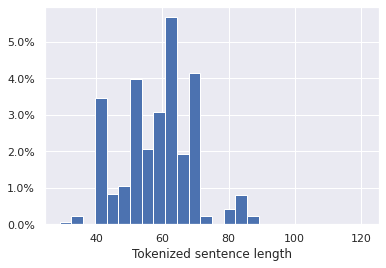

In [8]:
fig, ax = plt.subplots()
ax.hist(tokenized_lengths, bins=26, density=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Tokenized sentence length')
#tikzplotlib.save("HDFS1TrainBertTokenizedLengths.tikz")

In [9]:
train_time_ordered_roberta_ds = my_caching_load_from_disk(Path('/home/cernypro/dev/source/ml4logs/data/interim/HDFS1/no_timestamps_train-data-HDFS1-cv1-1-time-ordered/purely_tokenized_distilroberta-base'))

In [10]:
hdfs_roberta_lens_ds = train_time_ordered_roberta_ds.map(lambda tokens_batch: {'len': [len(tokens) for tokens in tokens_batch]}, input_columns='tokens', remove_columns=['text', 'tokens'], batched=True)

In [11]:
roberta_tokenized_lengths = np.array(hdfs_roberta_lens_ds['len'])

In [12]:
np.max(roberta_tokenized_lengths)

94

In [13]:
rob_lens_df = pd.DataFrame({'tokenized_length': roberta_tokenized_lengths})
# rob_lens_df.to_csv('HDFS1_train_time_roberta_tokenized_lengths.csv', index=False)

Text(0.5, 0, 'Tokenized sentence length')

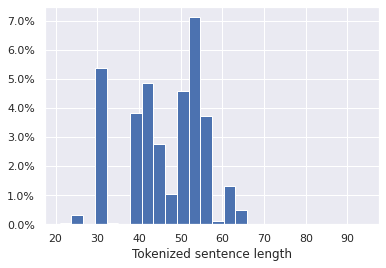

In [14]:
fig, ax = plt.subplots()
ax.hist(roberta_tokenized_lengths, bins=26, density=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Tokenized sentence length')
# tikzplotlib.save("HDFS1TrainRobertaTokenizedLengths.tikz")

In [15]:
comb_ds = my_caching_load_from_disk(Path('/home/cernypro/dev/source/ml4logs/data/interim/Combined_20210401/source_text_tokens_chunks_shuffled_seed-43/train'))

In [16]:
comb_ds

Dataset({
    features: ['chunk_text', 'chunk_tokens'],
    num_rows: 614429
})

In [17]:
comb_tok_lens_ds = comb_ds.map(lambda tokens_chunk: {'len': [len(tokens) for chunk in tokens_chunk for tokens in chunk]}, input_columns='chunk_tokens', remove_columns=['chunk_text', 'chunk_tokens'], batched=True)

In [18]:
comb_tok_lens = np.array(comb_tok_lens_ds['len'])

In [53]:
np.max(comb_tok_lens)

512

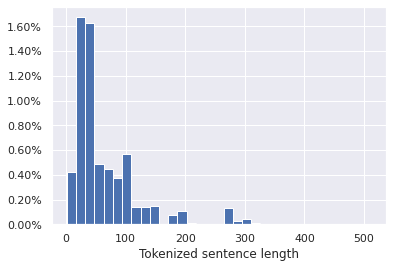

In [49]:
fig, ax = plt.subplots()
ax.hist(comb_tok_lens, bins=33, density=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Tokenized sentence length')
tikzplotlib.save("CombinedBertTokenizedLengths.tikz")

In [21]:
comb_lens_df = pd.DataFrame({'tokenized_length': comb_tok_lens})
# comb_lens_df.to_csv('Combined20210401_distilbert_tokenized_lengths.csv', index=False)

In [22]:
comb_lens_df

,tokenized_length
0,140
1,140
2,142
3,140
4,140
...,...
6144285,31
6144286,31
6144287,38
6144288,38


In [23]:
comb_rob_ds = my_caching_load_from_disk(Path('/home/cernypro/dev/source/ml4logs/data/interim/Combined_20210401_roberta/source_text_tokens_chunks_shuffled_seed-43_distilroberta-base/train'))

In [24]:
comb_rob_tok_lens_ds = comb_rob_ds.map(lambda tokens_chunk: {'len': [len(tokens) for chunk in tokens_chunk for tokens in chunk]}, input_columns='chunk_tokens', remove_columns=['chunk_text', 'chunk_tokens'], batched=True)

In [25]:
comb_rob_tok_lens = np.array(comb_rob_tok_lens_ds['len'])

In [52]:
np.max(comb_rob_tok_lens)

512

In [27]:
comb_rob_lens_df = pd.DataFrame({'tokenized_length': comb_rob_tok_lens})
comb_rob_lens_df.to_csv('Combined20210401_roberta_tokenized_lengths.csv', index=False)

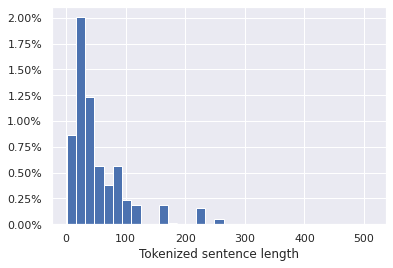

In [48]:
fig, ax = plt.subplots()
ax.hist(comb_rob_tok_lens, bins=33, density=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Tokenized sentence length')
tikzplotlib.save("CombinedRobertaTokenizedLengths.tikz")